In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm #svm导入
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes #把文本数据进行编码，比如a b c编码为 0 1 2
x = x[[0, 1]]

In [4]:
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

In [5]:
# svm.SVC API说明：
# 功能：使用SVM分类器进行模型构建
# 参数说明：
# C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，也就是说当C越大的时候，对于训练集的表现会越好，
# 但是有可能引发过度拟合的问题(overfiting)
# kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；
# degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3
# gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features
# coef0: 当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0
# probability：是否启用概率估计，默认不启动，不太建议启动
# shrinking：是否开启收缩启发式计算，默认为True
# tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3
# cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB
# class_weight：给定各个类别的权重，默认为空
# max_iter：最大迭代次数，默认-1表示不限制
# decision_function_shape: 决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；（1.7以上版本才有）
# '''

In [32]:
## 数据SVM分类器构建
clf = svm.SVC(C=1,kernel='rbf',gamma=0.1)
#gamma值越大，训练集的拟合就越好，但是会造成过拟合，导致测试集拟合变差
#gamma值越小，模型的泛化能力越好，训练集和测试集的拟合相近，但是会导致训练集出现欠拟合问题，
#从而，准确率变低，导致测试集准确率也变低。
## 模型训练
clf.fit(x_train, y_train)

TypeError: must be real number, not list

In [31]:
## 计算模型的准确率/精度
print (clf.score(x_train, y_train)) 
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

## 计算决策函数的结构值以及预测值(decision_function计算的是样本x到各个分割平面的距离<也就是决策函数的值>)
print ('decision_function:\n', clf.decision_function(x_train))
print ('\npredict:\n', clf.predict(x_train))

0.833333333333
训练集准确率： 0.833333333333
0.8
测试集准确率： 0.8
decision_function:
 [[-0.99997939 -0.47730033  0.59735511]
 [ 0.58315165  0.48953415  0.06527857]
 [-1.00365976 -0.40741298  0.75617089]
 [ 0.73517367  1.04632456  1.16328911]
 [-1.6141498  -1.60584228 -1.19006054]
 [ 1.34447039  1.27235306  0.61495178]
 [ 1.42415761  1.64746935  1.34237837]
 [ 0.73517367  1.04632456  1.16328911]
 [-0.07781394  0.60282679  1.44083908]
 [-2.07896357 -1.62423885 -0.29633211]
 [ 0.74428736  0.93832437  0.91050656]
 [-0.74513896 -0.13025356  0.9510734 ]
 [-0.98186116 -0.60891295  0.26095   ]
 [ 1.45983096  1.58532343  1.16217099]
 [-1.3859357  -1.31242983 -0.8124137 ]
 [-0.74103797 -0.26858989  0.64649279]
 [ 0.87368676  1.0099124   0.85190733]
 [-0.31282331 -0.22901236 -0.03438824]
 [ 0.47879253  0.60797463  0.59367436]
 [ 1.10698486  1.350223    1.22287404]
 [-1.12963386 -0.47250216  0.80801414]
 [-0.33638859  0.0208367   0.63447288]
 [ 0.16144544  0.91588772  1.65176561]
 [-0.60590392 -0.19562269  0.

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:552: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.19. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


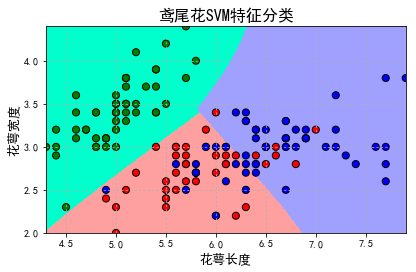

In [10]:
# 画图
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点


grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
## 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()